# Regression with MLPs
In this lesson we will see how an MLP model can learn to predict the value of a function in a given point. In particular, we will see how the model gradually learns to approximate the function and what are the limits of generalization of such a model.

_Notable caveat to this tutorial: this is an example of regression with MLPs, but in this task a [polynomial regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) could achieve better results with definitely less effort._

If you already have no done it, [try running this Test jupyter notebook](https://github.com/LucaCappelletti94/bioinformatics_practice/blob/master/Notebooks/Testing%20that%20everything%20works.ipynb) and check that everything does work nominally.

To run this jupyter you will need to have installed packages such as [sklearn](https://scikit-learn.org/stable/index.html) and [numpy](https://docs.scipy.org/doc/numpy/user/index.html), so to get started just run the following:

```bash
pip install numpy sklearn matplolib
```

In [1]:
# We import these packages using the standard notations
import numpy as np
import matplotlib.pyplot as plt

## Choosing a function to approximate
In this tutorial we get to choose a function that we will try to approximate. I will choose a combination of trigonometric functions, and I will pretend this is a signal that [I have received from some device](https://www.youtube.com/watch?v=AvUbqY1S-QQ).

Side note: I will use [type hinting](https://www.python.org/dev/peps/pep-0484/) to clarify what comes in and out of a function, but it is just a form on documentation. It does not do anything if not signal an IDE what the function has to receive and return.

In [2]:
def signal(x:np.ndarray)->np.ndarray:
    """An alien signal."""
    return np.sin(x) + np.sign(x)*np.log(1+np.abs(x/np.sqrt(1+np.abs(x))))

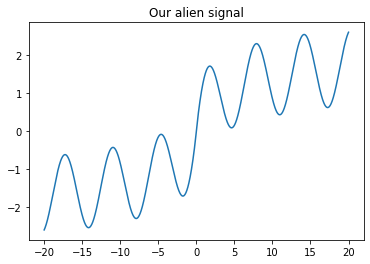

In [3]:
# Plotting the function
interval = 20
x = np.linspace(-interval, interval, num=10000)
plt.plot(x, signal(x))
plt.title("Our alien signal")
plt.show()

## Sampling a signal
Now, if we were to posess the original analytical signal (we do but we are pretending to not have it) it would be quite useless to try and build a model to predict it. In a real scenario, our device cannot pick up a continuos signal, but only an discrete approximation of the signal.

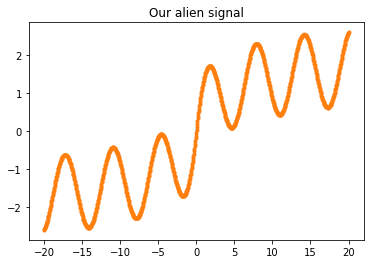

In [4]:
# Plotting the function
real_signal = np.linspace(-interval, interval, num=10000)
received_signal = np.linspace(-interval, interval, num=1000)
plt.plot(real_signal, signal(real_signal))
plt.plot(received_signal, signal(received_signal), '.')
plt.title("Our alien signal")
plt.show()

## Building a training and test dataset
To determine if a model is actually learning something usefull and not creating an hashmap of the values we need to create a proper training and testing dataset. Repartitions of the 80/20 kind are commonplace.

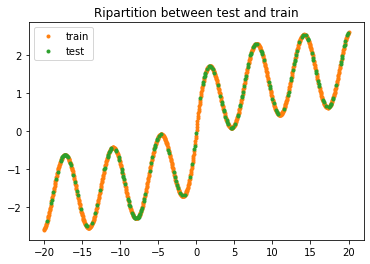

In [5]:
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(received_signal, signal(received_signal), test_size=0.2, random_state=42)

plt.plot(real_signal, signal(real_signal), alpha=0.4)
plt.plot(x_train, y_train, '.', label="train")
plt.plot(x_test, y_test, '.', label="test")
plt.title("Ripartition between test and train")
plt.legend()
plt.show()

# Building a simple MLP
Ok, now we can proceed building an MLP (multi-layer perceptron).

We will use a Sequential model from Keras and we will create a model with just two layers of 10 neurons each and an outlayer of a single neuron.

We will start with a simple linear model and see what happens. We can always make it more complex later!

We will add some bells and whistles just to make the experience a bit nicer, but these are not strictly required:

```bash
pip install plot_keras_history keras_ding keras_tqdm
```

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

our_first_linear_MLP = Sequential([
    Input(shape=(1,)), # Do not forget the comma in the tuple!
    Dense(100, activation="relu"), # A layer with 10 neurons
    Dense(100, activation="relu"), # A layer with 10 neurons
    Dense(100, activation="relu"), # A layer with 10 neurons
    Dense(1) # An output layer with a single neuron
])

Now that we have a model we have to compile it, choosing an optimizer and a loss function!

Since it's a pretty basic model let's start from the basics and use [Stocastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) as optimizer and since our task is a regression task we will use [MSE, the mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error).

In [7]:
our_first_linear_MLP.compile(
    optimizer="nadam",
    loss="MSE"
)

In [8]:
# Here we import some callbacks
from keras_ding import Ding
from keras_tqdm import TQDMNotebookCallback as ktqdm
# We also import the EarlyStopping callback, more on this one layer on!
# Basically it will stop the training of our model early it stops improving
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [9]:
history = our_first_linear_MLP.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1000,
    verbose=False,
    callbacks=[
        Ding("rick"),
        ktqdm(),
        EarlyStopping(monitor="loss", patience=5)
    ]
).history

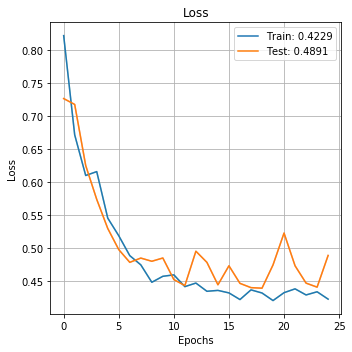

In [10]:
from plot_keras_history import plot_history
plot_history(history)
plt.show()

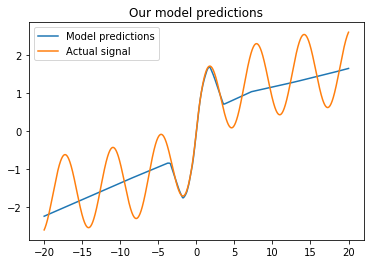

In [11]:
x = np.linspace(-interval, interval, num=10000)
plt.plot(x, our_first_linear_MLP.predict(x), label="Model predictions")
plt.plot(x, signal(x), label="Actual signal")
plt.title("Our model predictions")
plt.legend()
plt.show()